# The Winterwerp (1998) model 

## Introduction

**Summary:** This worksheet can be used to plot the Winterwerp (1998) model (W98). Follow this [link](https://github.com/FlocData/Floc-Analysis/blob/master/Winterwerp1998-Model-Fitting.ipynb) to find a worksheet that allows you to calibrate the W98 model to experimental data.

**Overview of the W98 model:** The W98 model is an ODE which defines the rate change in floc size, $dD_f/dt$, as being equal to the rate of aggregation, $A$, minus the rate of breakup, $B$. 

$$\frac{dD_f}{dt}=A-B$$

Here $D_f$ is the mean floc diameter, $A$ is the floc aggregation rate [L/t], and $B$ is the floc breakup rate [L/t]. Solution to the equation yields $D_f$ as a function of time.

The floc aggregation rate, $A$, is modeled in the formulation using collision theory in a turbulent environment for particles *smaller* than the Kolmogorov micro length scale; for reference, at $G=35$ s$^{-1}$, $\eta\approx 180$ $\mu$m. The aggregation model assumes that there is no loss of suspended sediment and that the total number of primary particles remains constant during the process of flocculation. Based on this, the resulting aggregation term is,

$$
A=K_{a}^{'}\frac{{D_{p}}^{n_{f}-3}}{n_{f}\rho _{s}}GCD^{4-n_{f}}
$$

where $D_{p}$ is the primary particle size, $n_{f}$ is the fractal dimension, $\rho _{s}$ is the sediment density, $G$ is the turbulent shear rate, $C$ is the sediment concentration [g/l], and $K_{a}^{'}$ is the collision efficiency coefficient that accounts for the fact that not all collisions result in aggregation. $K_{a}^{'}$ is an empirical coefficient that needs to be calibrated for each suspension of mud. The Winterwerp formulation for $B$ is:

$$
B=K_{b}^{'}\frac{{D_{p}}^{-p}}{n_{f}}\left ( \frac{\mu }{F_{y}} \right )^{q}G^{q+1}\left ( D-D_{p} \right )^{p}D^{2q+1}
$$

where $\mu$ is the dynamic fluid viscosity, $F_{y}$ is the floc strength $[N]$, $K_{b}^{'}$ is the breakup coefficient, and $p$ and $q$ are coefficients. In the model, $F_{y}$ and $K_{b}^{'}$ are functions of the sediment and water physico-chemical properties that need to be empirically determined. Winterwerp suggests $p=3-n_{f}$ and $q$ to be 0.5, respectively, with $F_{y} = 10^{-10}$ N for estuarine flocs.

The equilibrium floc size, $D_{fe}$ is the defined as the size for which $A=B$.

References:
Winterwerp, J. C. (1998). A simple model for turbulence induced flocculation of cohesive sediment. Journal of Hydraulic Research, 36(3):309–326. http://dx.doi.org/10.1080/00221689809498621

## Plotting W98

###  Load the needed packages and define the model

In [1]:
%pylab inline
%config InlineBackend.figure_format='retina' # hig-res plots for a Retina display
import numpy as np
from scipy.integrate import odeint
import waterprop as wp

# The W98 ODE to be integrated: dDdt = A-B using the primed coefficients
def dDdt(D, t): 
    A = Ka*(Dp**(nf-3)/(nf*rhos))*G*C*D**(4-nf) # aggregation term
    B = Kb*((Dp**(-p))/nf)*(mu/Fy)**q*G**(q+1)*(D-Dp)**p*D**(2*q+1) # breakup term
    dDdt = A-B
    return dDdt

# The W98 ODE to be integrated: dDdt = A-B using the composite coefficients
def dDdtCOMP(D, t): 
    A = Kacomp*G*C*D**(4-nf) # aggregation term
    B = Kbcomp*G**(q+1)*(D-Dp)**p*D**(2*q+1) # breakup term
    dDdt = A-B
    return dDdt

Populating the interactive namespace from numpy and matplotlib


### Plot the W98 model using the primed coefficients $K_a'$ and $K_b'$

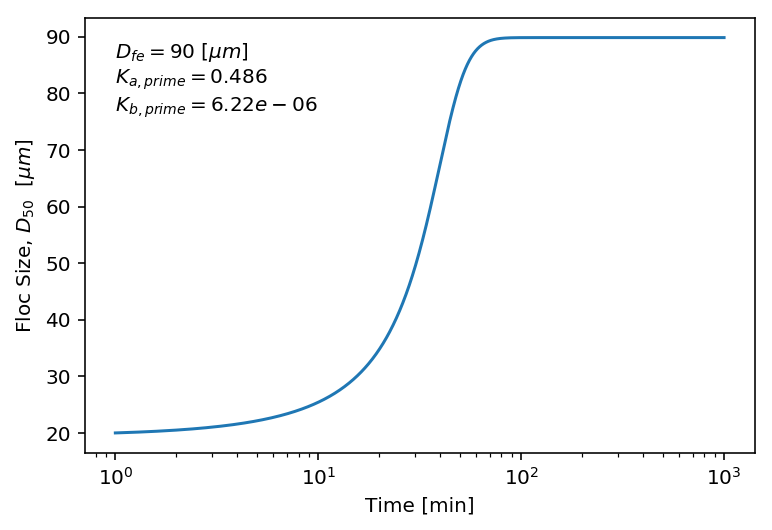

In [2]:
"""
User input --------------------------------------------------------
"""
# Fluid properties 
G = 35.          # turbulent shear rate[s-1]
To = 20          # temperature in degC
Sppt = 0         # salinity in parts per thousand 

# Sediment properties
C = 50/10**3     # suspended sediment concentration [g/L]
Dp = 7/10**6     # primary particle size [m]
Fy = 1e-10       # floc yeild strength [N]
rhos = 2500.     # sediment density [kg/m3]
nf = 2.          # fractal dimension
Ka = 0.4861         # PRIMED aggregation coef
Kb = 6.22e-06      # PRIMED breakup coef

# Calculation inputs 
tstart_min = 1   # minute to start the integration at
tend_min = 1000  # minute to end the integration at
Npts = 10000     # number of points in calculation
D0 = 20/10**6    # floc size at tstart_min [m]

"""
Calculations ----------------------------------------------------
"""
# Pre-integration calcs and array setup
rho = wp.density(To,Sppt)
nu = wp.visc(To)
mu = nu*rho     
p = 3.-nf
q = 0.5

# Setup time array for integration
t = np.linspace(tstart_min*60,tend_min*60,Npts)

# Solution to the ODE D'(t) = dDdt(D, t, Ka, Kb) with initial condition D(0) = D0
Df = odeint(dDdt, D0, t)

Dfe = Df[-1]

# Plot and print the results
fig, ax = plt.subplots()
ax.plot(t/60,Df*10**6, label='W98')
ax.set_xscale('log'),
ax.set_xlabel('Time [min]')
ax.set_ylabel('Floc Size, $D_{50}$  [$\mu m$]')
results ='$D_{fe}=%.0f$ $[µm]$\n$K_{a,prime}=%.3f$\n$K_{b,prime}=%1.2e$'%(Dfe*10**6,Ka,Kb)
ax.text(t[0]/60,0.85*Dfe*10**6,results);

### Plot the W98 model using the composite coefficients $K_a$ and $K_b$

Sometimes the leading terms in the aggregation and breakup rate term, $A$ and $B$, are expressed as composite coefficients $K_a$ and $K_b$ where:

$$ K_b = K_{a}^{'}\frac{{D_{p}}^{n_{f}-3}}{n_{f}\rho _{s}} $$

and 

$$ K_b = K_{b}^{'}\frac{{D_{p}}^{-p}}{n_{f}}\left ( \frac{\mu }{F_{y}} \right )^{q}$$

Note that the particular value of $n_f$ is tied up in the definition of the composite $K_b$. Below is a block of code that will plot the W98 model using the composite $K_a$ and $K_b$ values.

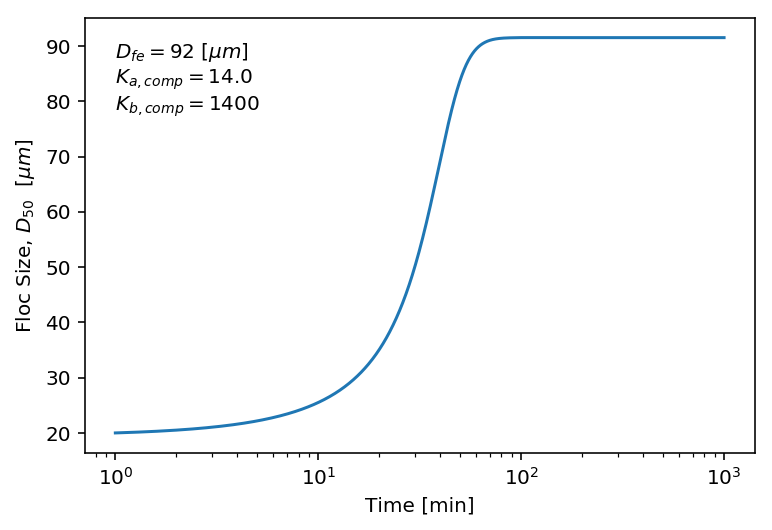

In [3]:
"""
User input --------------------------------------------------------
"""
# Fluid properties 
G = 35.          # turbulent shear rate[s-1]
To = 20          # temperature in degC
Sppt = 0         # salinity in parts per thousand 

# Sediment properties
C = 50/10**3     # suspended sediment concentration [g/L]
Dp = 7/10**6     # primary particle size [m]
nf = 2.          # fractal dimension
Kacomp = 14      # COMPOSITE aggregation coef
Kbcomp = 1400    # COMPOSITE breakup coef

# Calculation inputs 
tstart_min = 1    # minute to start the integration at
tend_min = 1000   # minute to end the integration at
Npts = 10000      # number of points in calculation
D0 = 20/10**6     # floc size at tstart_min [m]

"""
Calculations ----------------------------------------------------
"""
# Pre-integration calcs and array setup
rho = wp.density(To,Sppt)
nu = wp.visc(To)
mu = nu*rho     
p = 3.-nf
q = 0.5

# Setup time array for integration
t = np.linspace(tstart_min*60,tend_min*60,Npts)

# Solution to the ODE D'(t) = dDdt(D, t, Ka, Kb) with initial condition D(0) = D0
Df = odeint(dDdtCOMP, D0, t)

Dfe = Df[-1]

# Plot and print the results
fig, ax = plt.subplots()
ax.plot(t/60,Df*10**6, label='W98')
ax.set_xscale('log'),
ax.set_xlabel('Time [min]')
ax.set_ylabel('Floc Size, $D_{50}$  [$\mu m$]')
results ='$D_{fe}=%.0f$ $[µm]$\n$K_{a,comp}=%.1f$\n$K_{b,comp}=%.0f$'%(Dfe*10**6,Kacomp,Kbcomp)
ax.text(t[0]/60,0.85*Dfe*10**6,results);